# Kaggle Challenge
## Loan Approval Prediction - New York
El reto consiste en aplicar algoritmos de Machine Learning para predecir la emisión de créditos a un cliente en función de un dataset de entrada para el entrenamiento correspondiente.

El dataset está formado por los siguientes campos:

- id # Text # Identifier of the data instance
- LoanNr_ChkDgt # Text # Identifier of the loan petition
- Name # Text # Borrower name
- City # Text # Borrower city
- State # Text # Borrower state
- Bank # Text # Bank name
- BankState # Text # Bank state
- ApprovalDate # Date/Time # Date SBA commitment issued
- ApprovalFY # Text # Fiscal year of commitment
- NoEmp # Number # Number of business employees
- NewExist # Text # 1 = Existing business, 2 = New business
- CreateJob # Number # Number of jobs created
- RetainedJob # Number # Number of jobs retained
- FranchiseCode # Text # Franchise code, (00000 or 00001) = No franchise
- UrbanRural # Text # 1 = Urban, 2 = rural, 0 = undefined
- RevLineCr # Text # Revolving line of credit: Y = Yes, N = No
- LowDoc # Text # LowDoc Loan Program: Y = Yes, N = No
- DisbursementDate # Date/Time # Disbursement date
- DisbursementGross # Currency # Amount disbursed
- BalanceGross # Currency # Gross amount outstanding
- Accept # Text # Loan approval status. 0 = not approved, 1 = approved


## 1º Paso: Importar datos.

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

original_data = pd.read_csv('data_reto_1/train.csv')
original_data

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,1238924005,"NBFD, INC.",OLEAN,NY,COMMUNITY BANK NATL ASSOC,NY,15-May-97,1997,25,...,0,0,1,0,N,Y,3-Jun-97,"$50,000.00",$0.00,1
40381,e1e96f4af51,3681885006,Altman Stage Lighting Co.,YONKERS,NY,EH NATIONAL BANK,CA,7-Oct-09,2010,100,...,10,100,0,1,N,N,7-Oct-09,"$1,666,600.00",$0.00,1
40382,29aabac46d9,1497375007,Paws & Claws Pet Boutique LLC,SEAFORD,NY,HSBC BK USA NATL ASSOC,NY,13-Oct-05,2006,1,...,0,1,0,1,N,N,30-Apr-06,"$25,000.00",$0.00,1
40383,2ed947e57f5,1757175003,Bay Medical Supplies Inc,BROOKLYN,NY,HSBC BK USA NATL ASSOC,NY,10-Apr-06,2006,1,...,0,1,0,1,Y,N,31-May-06,"$73,363.00",$0.00,1


##  2º:Limpieza de datos

Eliminaremos campos irrelevantes o no necesarios:

Visualizamos los datos

In [107]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   LoanNr_ChkDgt      40385 non-null  int64  
 2   Name               40382 non-null  object 
 3   City               40385 non-null  object 
 4   State              40385 non-null  object 
 5   Bank               40340 non-null  object 
 6   BankState          40338 non-null  object 
 7   ApprovalDate       40385 non-null  object 
 8   ApprovalFY         40385 non-null  object 
 9   NoEmp              40385 non-null  int64  
 10  NewExist           40378 non-null  float64
 11  CreateJob          40385 non-null  int64  
 12  RetainedJob        40385 non-null  int64  
 13  FranchiseCode      40385 non-null  int64  
 14  UrbanRural         40385 non-null  int64  
 15  RevLineCr          40250 non-null  object 
 16  LowDoc             403

Transformamos los campos 

In [108]:
original_data.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.038500e+04,40385.000000,40378.000000,40385.000000,40385.000000,40385.000000,40385.00000,40385.000000
mean,4.459565e+09,9.485750,1.279013,4.273666,7.128191,1218.894342,0.76885,0.796360
std,2.539048e+09,54.872591,0.451107,151.989529,152.156119,8647.991363,0.59020,0.402709
min,1.000655e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.276314e+09,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,3.804294e+09,4.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
75%,6.409913e+09,9.000000,2.000000,1.000000,5.000000,1.000000,1.00000,1.000000
max,9.995413e+09,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.00000,1.000000


A eliminar

LoanNr_ChkDgt porque es un identificador de la solicitud no aporta información.

Name ya que hay 37616 valores únicos en 40385 registros 

City idem que anterior hay 32362 valores distintos para 40385

State porque todos son de NY por tanto no aporta información.

Bank

Bank State

ApprovalDate

ApprovalFY

DisbursementDate

BalanceGross todos tienen el mismo valor y no aporta información.


In [109]:
original_data.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'BalanceGross'], axis=1, inplace=True)

In [110]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40385 entries, 0 to 40384
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40385 non-null  object 
 1   NoEmp              40385 non-null  int64  
 2   NewExist           40378 non-null  float64
 3   CreateJob          40385 non-null  int64  
 4   RetainedJob        40385 non-null  int64  
 5   FranchiseCode      40385 non-null  int64  
 6   UrbanRural         40385 non-null  int64  
 7   RevLineCr          40250 non-null  object 
 8   LowDoc             40330 non-null  object 
 9   DisbursementGross  40385 non-null  object 
 10  Accept             40385 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.4+ MB


In [111]:
original_data.describe()

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,40385.000000,40378.000000,40385.000000,40385.000000,40385.000000,40385.00000,40385.000000
mean,9.485750,1.279013,4.273666,7.128191,1218.894342,0.76885,0.796360
std,54.872591,0.451107,151.989529,152.156119,8647.991363,0.59020,0.402709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,4.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
75%,9.000000,2.000000,1.000000,5.000000,1.000000,1.00000,1.000000
max,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.00000,1.000000


Convertimos los datos

 2   NewExist           7049 non-null   float64-> int64
 
 7   RevLineCr          7038 non-null   object -> int64
 
 8   LowDoc             7046 non-null   object -> int64
 
 9   DisbursementGross  7050 non-null   object -> float64

In [112]:
####RETOCAR Y PONERLO BONITO 
original_data["id"] = original_data["id"].astype(str)
original_data["NewExist"] = original_data["NewExist"].fillna(original_data.median(numeric_only=True))

original_data.loc[original_data["RevLineCr"] == "N", "RevLineCr"] = 0
original_data.loc[original_data["RevLineCr"] == "Y", "RevLineCr"] = 1
original_data.loc[original_data["RevLineCr"] == "T", "RevLineCr"] = 1
original_data["RevLineCr"] = original_data["RevLineCr"].fillna(1)
original_data["RevLineCr"] = original_data["RevLineCr"].astype(int)
original_data.loc[original_data["LowDoc"] == "N", "LowDoc"] = 0
original_data.loc[original_data["LowDoc"] == "Y", "LowDoc"] = 1
original_data.loc[original_data["LowDoc"] == "R", "LowDoc"] = 1
original_data.loc[original_data["LowDoc"] == "C", "LowDoc"] = 1
original_data.loc[original_data["LowDoc"] == "S", "LowDoc"] = 1
original_data.loc[original_data["LowDoc"] == "A", "LowDoc"] = 1
original_data["LowDoc"] = original_data["LowDoc"].fillna(1)
original_data["LowDoc"] = original_data["LowDoc"].astype(int)

original_data["DisbursementGross"] = original_data["DisbursementGross"].astype(str)
original_data["DisbursementGross"] = original_data["DisbursementGross"].apply(lambda x: x[1:])
original_data["DisbursementGross"] = original_data["DisbursementGross"].replace({',':''}, regex=True)
original_data["DisbursementGross"] = original_data["DisbursementGross"].fillna(0)
original_data.loc[original_data["DisbursementGross"] == "", "DisbursementGross"] = 0
original_data.loc[original_data["DisbursementGross"] == " ", "DisbursementGross"] = 0
original_data["DisbursementGross"] = original_data["DisbursementGross"].astype(float)
original_data["DisbursementGross"] = original_data["DisbursementGross"]/100000
original_data = original_data.dropna()

In [113]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40378 entries, 0 to 40384
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40378 non-null  object 
 1   NoEmp              40378 non-null  int64  
 2   NewExist           40378 non-null  float64
 3   CreateJob          40378 non-null  int64  
 4   RetainedJob        40378 non-null  int64  
 5   FranchiseCode      40378 non-null  int64  
 6   UrbanRural         40378 non-null  int64  
 7   RevLineCr          40378 non-null  int32  
 8   LowDoc             40378 non-null  int32  
 9   DisbursementGross  40378 non-null  float64
 10  Accept             40378 non-null  int64  
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 3.4+ MB


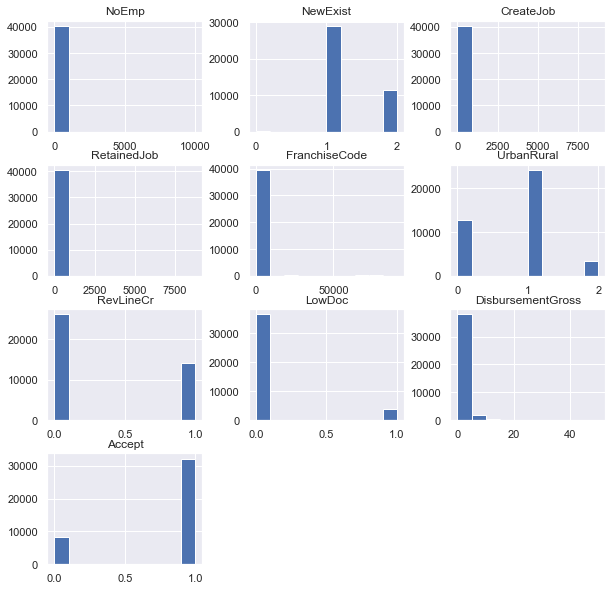

In [114]:
# General import and load data
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots

#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline

original_data.hist(figsize=(10,10))
plt.show()

In [115]:
original_data.describe()

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Accept
count,40378.000000,40378.000000,40378.000000,40378.000000,40378.000000,40378.000000,40378.000000,40378.000000,40378.000000,40378.000000
mean,9.485933,1.279013,4.274233,7.128312,1219.105652,0.768810,0.350983,0.094036,1.469502,0.796374
std,54.877253,0.451107,152.002696,152.169287,8648.726071,0.590244,0.477284,0.291883,2.180474,0.402699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,1.000000
50%,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,1.000000
75%,9.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.549385,1.000000
max,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.000000,1.000000,1.000000,50.000000,1.000000


In [116]:
original_data

,id,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Accept
0,b353a0b461c,20,1.0,0,0,0,0,0,0,3.50000,1
1,cca24bbcc48,3,1.0,1,4,0,2,0,0,0.35000,1
2,e60644381ce,5,1.0,0,5,1,1,0,0,0.50000,1
3,ffca41a2760,25,1.0,0,0,1,0,0,0,1.90000,1
4,79e48255003,6,1.0,0,0,1,1,0,1,0.30000,1
...,...,...,...,...,...,...,...,...,...,...,...
40380,8db591edafe,25,2.0,0,0,1,0,0,1,0.50000,1
40381,e1e96f4af51,100,1.0,10,100,0,1,0,0,16.66600,1
40382,29aabac46d9,1,2.0,0,1,0,1,0,0,0.25000,1
40383,2ed947e57f5,1,2.0,0,1,0,1,1,0,0.73363,1


In [117]:
original_data.isnull().sum()

id                   0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
Accept               0
dtype: int64

In [118]:
original_data['NewExist'].isnull().any()

False

# 3º Algoritmo de ML
El algoritmo es bernoulli naive bayes

In [119]:
# Features of the model
features = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr','LowDoc','DisbursementGross']
# Transform dataframe in numpy arrays
Z = original_data['id'].values
X = original_data[features].values
y = original_data['Accept'].values



# Test set will be the 7050 taken randomly
Z_train, Z_test, X_train, X_test, y_train, y_test = train_test_split(Z,X, y, test_size=7050, random_state=33)

Defino modelo

In [120]:

alpha = 3.0
binarize = 0.0 
fit_prior = True
class_prior = None
# Create BernoulliNB model
model = BernoulliNB()

In [121]:
#This step will take some time 


model.fit(X_train, y_train)

predicted = model.predict(X_test)
expected = y_test

In [122]:
# Accuracy
metrics.accuracy_score(expected, predicted)

0.744822695035461

In [123]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[ 492  927]
 [ 872 4759]]


In [124]:
# Report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.36      0.35      0.35      1419
           1       0.84      0.85      0.84      5631

    accuracy                           0.74      7050
   macro avg       0.60      0.60      0.60      7050
weighted avg       0.74      0.74      0.74      7050



## 4ºEntrega

In [125]:
len(X_train)

33328

In [126]:
len(X_test)

7050

In [127]:
len(y_train)

33328

In [128]:
len(y_test)

7050

In [129]:
len(Z_test)

7050

In [138]:
Entrega = pd.DataFrame(data= {'Accept':y_test}  , index=Z_test )
#pd.DataFrame(data=[ y_test,Z_test ] )
#d = {'id': Z_test, 'Accept': y_test }
#Entrega = pd.DataFrame(data=d  )
Entrega

,Accept
fabbb1643af,1
8a6602a68eb,1
c55063a0008,0
4ca0127e366,1
f41e9c3cbb2,1
...,...
883a2cff012,1
7caff0d823d,1
17d0133aebc,1
f71ebf93f6a,1


In [134]:
Entrega.to_csv(r'C:\Users\José Manuel Rengifo\Documents\Universidad\MUIRST\Asignaturas\DATOS\sitc\submission.csv', index=True)